# 2. Pandas


## 00. Setup
**Mērķis:** Importēt bibliotēkas un sagatavot vidi.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)
np.random.seed(42)


## 01. Atgādinājums par Numpy masīviem
**Mērķis:** Atsvaidzināt 2D masīvu ideju un indeksēšanu.

In [33]:
a = np.arange(12).reshape(3, 4)
a


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
# Piekļuve pēc rindas/kolonnas indeksa (0-bāzēts)
a[1, 2], a[0, :], a[:, 3]


(np.int64(6), array([0, 1, 2, 3]), array([ 3,  7, 11]))

## 02. Pandas masīvi — motivācija (pingvīni)
**Mērķis:** Redzēt, kā Pandas ļauj glabāt dažādus datu tipus vienā tabulā.

In [35]:
# Mini piemērs: daži "pingvīni" ar dažādiem parametriem un datu tipiem
df = pd.DataFrame({
    "sex": ["male", "female", "female", "male", "male"],
    "species": ["Adelie", "Gentoo", "Adelie", "Chinstrap", "Gentoo"],
    "bill_length_mm": [39.1, 50.0, 38.9, 46.5, 49.8],
    "flipper_length_mm": [181, 215, 190, 198, 210],
    "body_mass_kg": [3.75, 5.05, 3.40, 3.80, 5.20],
})
df


,sex,species,bill_length_mm,flipper_length_mm,body_mass_kg
0,male,Adelie,39.1,181,3.75
1,female,Gentoo,50.0,215,5.05
2,female,Adelie,38.9,190,3.40
3,male,Chinstrap,46.5,198,3.80
4,male,Gentoo,49.8,210,5.20


In [36]:
df.dtypes


sex                   object
species               object
bill_length_mm       float64
flipper_length_mm      int64
body_mass_kg         float64
dtype: object

## 03. Pandas DataFrame uzbūve
**Mērķis:** Saprast `index`, `columns` un `data` (vērtības).

In [37]:
df.index, df.columns


(RangeIndex(start=0, stop=5, step=1),
 Index(['sex', 'species', 'bill_length_mm', 'flipper_length_mm', 'body_mass_kg'], dtype='object'))

In [38]:
# 2D "data" — parasti ar vienotu dtype, ja to konvertē uz numpy
df.to_numpy()[:2]


array([['male', 'Adelie', 39.1, 181, 3.75],
       ['female', 'Gentoo', 50.0, 215, 5.05]], dtype=object)

## 04. Piekļuve datiem: `.iloc` un `.loc`
**Mērķis:** Praktiski iemācīties piekļuvi pēc indeksa (integer) un pēc nosaukumiem (label).

In [39]:
# .iloc: integer locate (pēc pozīcijas)
df.iloc[0, 2]  # pirmais pingvīns, bill_length_mm


np.float64(39.1)

In [40]:
# .loc: locate (pēc nosaukumiem)
# Šeit rindas nosaukumi ir 0..n-1, tāpēc label sakrīt ar integer, bet ideja ir: label-based piekļuve.
df.loc[0, "bill_length_mm"]


np.float64(39.1)

In [41]:
# Ātrie "skalari": iat/at (analogs iloc/loc, bet vienam elementam)
df.iat[0, 2], df.at[0, "bill_length_mm"]


(np.float64(39.1), np.float64(39.1))

### 04.1. Piemērs ar savu indeksu
**Mērķis:** Redzēt atšķirību, kad `index` nav vienkārši 0..n-1.

In [42]:
df2 = df.copy()
df2.index = [f"penguin_{i}" for i in range(1, len(df2) + 1)]
df2


,sex,species,bill_length_mm,flipper_length_mm,body_mass_kg
penguin_1,male,Adelie,39.1,181,3.75
penguin_2,female,Gentoo,50.0,215,5.05
penguin_3,female,Adelie,38.9,190,3.40
penguin_4,male,Chinstrap,46.5,198,3.80
penguin_5,male,Gentoo,49.8,210,5.20


In [43]:
# Tagad loc izmanto rindas nosaukumu (label), iloc — pozīciju
df2.loc["penguin_1", "species"], df2.iloc[0, 1]


('Adelie', 'Adelie')

## 05. Loģiskā indeksēšana (datu atlasīšana)
**Mērķis:** Atlasīt rindas pēc nosacījumiem, līdzīgi kā Numpy maskas.

In [44]:
# Atlasām tikai Gentoo sugu
df[df["species"] == "Gentoo"]


,sex,species,bill_length_mm,flipper_length_mm,body_mass_kg
1,female,Gentoo,50.0,215,5.05
4,male,Gentoo,49.8,210,5.20


In [45]:
# Vairāki kritēriji: AND (&), OR (|), NOT (~)
# Piemērs: atlasīt tēviņus, kas smagāki par 3.5kg
mask = (df["sex"] == "male") & (df["body_mass_kg"] > 3.5)
df[mask]


,sex,species,bill_length_mm,flipper_length_mm,body_mass_kg
0,male,Adelie,39.1,181,3.75
3,male,Chinstrap,46.5,198,3.80
4,male,Gentoo,49.8,210,5.20


## 06. Datu grupēšana: `groupby`
**Mērķis:** Aprēķināt statistiku pa grupām (piemēram, pa sugām).

In [46]:
# Vidējās vērtības pa sugām (tikai skaitliskajām kolonnām)
df.groupby("species").mean(numeric_only=True)


,bill_length_mm,flipper_length_mm,body_mass_kg
species,,,
Adelie,39.0,185.5,3.575
Chinstrap,46.5,198.0,3.800
Gentoo,49.9,212.5,5.125


In [47]:
# Vairāki agregāti reizē
df.groupby("species").agg(
    bill_length_mean=("bill_length_mm", "mean"),
    bill_length_min=("bill_length_mm", "min"),
    bill_length_max=("bill_length_mm", "max"),
    mass_mean=("body_mass_kg", "mean"),
)


,bill_length_mean,bill_length_min,bill_length_max,mass_mean
species,,,,
Adelie,39.0,38.9,39.1,3.575
Chinstrap,46.5,46.5,46.5,3.800
Gentoo,49.9,49.8,50.0,5.125


## 07. Darbības ar laikrindām
**Mērķis:** Iepazīties ar `Timestamp`, `Timedelta`, datumu veidošanu un `dt` īpašībām.

In [48]:
date = pd.to_datetime("2023-04-16 12:35:00")
date, type(date)


(Timestamp('2023-04-16 12:35:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [49]:
delta = pd.to_timedelta("6D")
date + delta


Timestamp('2023-04-22 12:35:00')

In [50]:
# Piekļuve komponentēm
date.year, date.month, date.day, date.hour


(2023, 4, 16, 12)

### 07.1. Mini laikrinda (stundas mērījumi)
**Mērķis:** Sagatavot sintētisku meteoroloģisku laikrindu, lai trenētos ar `resample/groupby`.

In [51]:
# Sintētiska temperatūra (hourly), vairākus gadus
idx = pd.date_range("2018-01-01", "2022-12-31 23:00:00", freq="H", tz="UTC")
hours = np.arange(len(idx))
# Sezonalitāte + diennakts cikls + troksnis
seasonal = 10 * np.sin(2 * np.pi * (idx.dayofyear.to_numpy() / 365.25))
daily = 3 * np.sin(2 * np.pi * (idx.hour.to_numpy() / 24))
noise = np.random.normal(0, 1.5, size=len(idx))
temp = 2 + seasonal + daily + noise

ts = pd.Series(temp, index=idx, name="temp_C")
ts.head()


C:\Users\mrant\AppData\Local\Temp\ipykernel_23672\1903314212.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range("2018-01-01", "2022-12-31 23:00:00", freq="H", tz="UTC")


2018-01-01 00:00:00+00:00    2.917087
2018-01-01 01:00:00+00:00    2.741076
2018-01-01 02:00:00+00:00    4.643549
2018-01-01 03:00:00+00:00    6.577881
2018-01-01 04:00:00+00:00    4.418862
Freq: h, Name: temp_C, dtype: float64

## 08. Grupēšana pēc laika periodiem (`resample`)
**Mērķis:** Aprēķināt, piemēram, mēneša vidējo temperatūru.

In [52]:
monthly_mean = ts.resample("M").mean()
monthly_mean.head()


C:\Users\mrant\AppData\Local\Temp\ipykernel_23672\2043708502.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = ts.resample("M").mean()


2018-01-31 00:00:00+00:00     4.664299
2018-02-28 00:00:00+00:00     9.126299
2018-03-31 00:00:00+00:00    11.543997
2018-04-30 00:00:00+00:00    11.635015
2018-05-31 00:00:00+00:00     9.100774
Freq: ME, Name: temp_C, dtype: float64

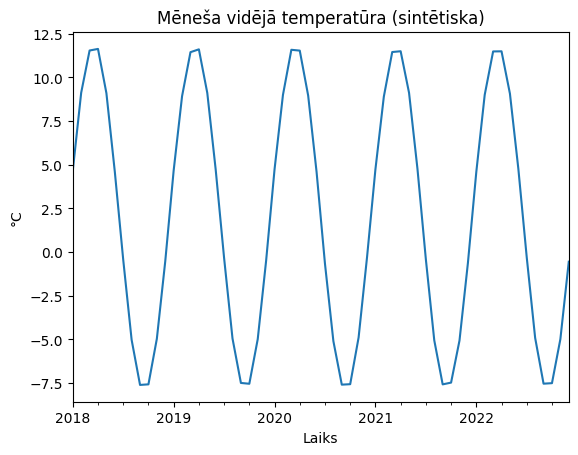

In [53]:
# (Neobligāti) ātrs grafiks
monthly_mean.plot()
plt.title("Mēneša vidējā temperatūra (sintētiska)")
plt.xlabel("Laiks")
plt.ylabel("°C")
plt.show()


## 09. Piemēri

### 09.1. Piemērs 1 — karstākā nakts katrā gadā
Kā pa gadiem mainījusies diennakts minimālās temperatūras maksimālā vērtība? (Cik karsta bijusi gada karstākā nakts?)

In [54]:
# 1) aprēķinām katras dienas minimumu
daily_min = ts.resample("D").min()

# 2) pa gadiem atrodam "maksimālo no dienas minimumiem"
hottest_night_per_year = daily_min.groupby(daily_min.index.year).max()
hottest_night_per_year


2018    8.720869
2019    8.702954
2020    8.429434
2021    8.800811
2022    9.188827
Name: temp_C, dtype: float64

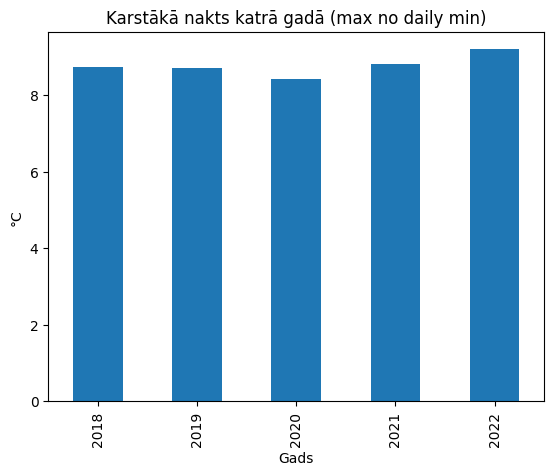

In [55]:
hottest_night_per_year.plot(kind="bar")
plt.title("Karstākā nakts katrā gadā (max no daily min)")
plt.xlabel("Gads")
plt.ylabel("°C")
plt.show()


### 09.2. Piemērs 2 — temperatūra pret diennakts laiku pavasarī
Kāda ir gaisa temperatūras atkarība no diennakts laika pavasarī?

In [56]:
spring = ts[(ts.index.month >= 3) & (ts.index.month <= 5)]
by_hour = spring.groupby(spring.index.hour).mean()
by_hour


0     10.656468
1     11.481271
2     12.121480
3     12.795768
4     13.381956
5     13.748296
6     13.703810
7     13.519874
8     13.365192
9     12.750364
10    12.144598
11    11.604618
12    10.760428
13     9.975761
14     9.206207
15     8.437510
16     8.143496
17     7.896998
18     7.651015
19     7.821787
20     8.043105
21     8.527982
22     9.149120
23     9.980537
Name: temp_C, dtype: float64

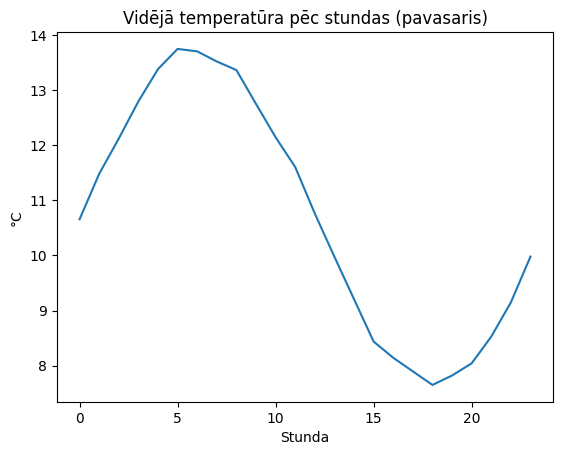

In [57]:
by_hour.plot()
plt.title("Vidējā temperatūra pēc stundas (pavasaris)")
plt.xlabel("Stunda")
plt.ylabel("°C")
plt.show()


### 09.3. Piemērs 3 — dienas bez atkušņa skaits pa gadiem
Diena bez atkušņa: diena, kad max temperatūra nepārsniedz 0°C. Kā tas mainījies pa gadiem?

In [58]:
daily_max = ts.resample("D").max()
no_thaw = daily_max <= 0.0
no_thaw_days_per_year = no_thaw.groupby(no_thaw.index.year).sum()
no_thaw_days_per_year


2018    96
2019    97
2020    91
2021    96
2022    94
Name: temp_C, dtype: int64

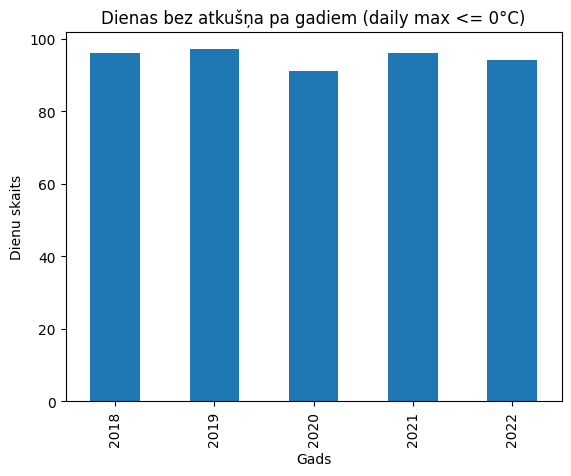

In [59]:
no_thaw_days_per_year.plot(kind="bar")
plt.title("Dienas bez atkušņa pa gadiem (daily max <= 0°C)")
plt.xlabel("Gads")
plt.ylabel("Dienu skaits")
plt.show()


## 10. Laika zonas
**Mērķis:** `tz_localize` un `tz_convert` — piešķirt laika zonu un konvertēt (piem., uz UTC).

In [60]:
# Pieņemsim, ka ir lokāls laiks bez tz informācijas
local_naive = pd.to_datetime("2023-04-16 12:35:00")
local_naive


Timestamp('2023-04-16 12:35:00')

In [61]:
# Piešķiram laika zonu Europe/Riga (padara timestamp tz-aware)
local_riga = local_naive.tz_localize("Europe/Riga")
local_riga


Timestamp('2023-04-16 12:35:00+0300', tz='Europe/Riga')

In [62]:
# Konvertējam uz UTC
local_riga.tz_convert("UTC")


Timestamp('2023-04-16 09:35:00+0000', tz='UTC')